In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
df = pd.read_csv('Consumer_Airfare_Report.csv')  

# Inspect the data by showing top 5 rows
df.head()




C:\Users\brand\AppData\Local\Temp\ipykernel_26368\2246154583.py:8: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Consumer_Airfare_Report.csv')


tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airportid_2 airport_1  ...    fare  carrier_lg  large_ms  fare_lg  \
0        14112       ABE  ...   81.43          G4    1.0000    81.43   
1        15304       ABE  ...  208.93          DL    0.4659   219.98   
2        11259       ABQ  ...  184.56          WN    0.9968   184.44   
3        11298       ABQ  ...  182.64          AA    0.9774   183.09   
4        14107       ABQ  ...  177.11          WN    0.6061   184.49   

  carrier_low   lf_ms  fare_low Geocoded_City1  Geocoded_City2  \
0          G4  1.0000     81.43            NaN             NaN   
1          UA  0.1193    154.11            NaN             NaN   
2          WN  0.9968    184.44            NaN             NaN   
3          AA  0.9774    183.09            NaN             NaN   
4          AA  0.3939    165.77            NaN             NaN   

                 tbl1apk  
0  202131013514112ABEPIE  
1  202131013515304ABETPA  
2  202131014011259ABQDAL  
3  202131014011298ABQDFW  
4  202131014014107ABQPHX  

[5 rows x 23 columns]

# EDA/ Data Cleaning 

In [3]:
df.tail()

tbl  Year  quarter  citymarketid_1  citymarketid_2          city1  \
242097  Table1a  2023        3           35412           31703  Knoxville, TN   
242098  Table1a  2023        3           35412           32467  Knoxville, TN   
242099  Table1a  2023        3           35412           32467  Knoxville, TN   
242100  Table1a  2023        3           35412           33195  Knoxville, TN   
242101  Table1a  2023        3           35412           33195  Knoxville, TN   

                                        city2  airportid_1  airportid_2  \
242097  New York City, NY (Metropolitan Area)        15412        12953   
242098          Miami, FL (Metropolitan Area)        15412        11697   
242099          Miami, FL (Metropolitan Area)        15412        13303   
242100          Tampa, FL (Metropolitan Area)        15412        14112   
242101          Tampa, FL (Metropolitan Area)        15412        15304   

       airport_1  ...    fare  carrier_lg  large_ms  fare_lg carrier_low  \
242097       TYS  ...  254.82          DL    0.7153   262.92          AA   
242098       TYS  ...  127.59          G4    0.8767    93.08          G4   
242099       TYS  ...  322.66          AA    0.6823   305.03          AA   
242100       TYS  ...   81.97          G4    1.0000    81.97          G4   
242101       TYS  ...  337.39          DL    0.5726   347.02          AA   

         lf_ms  fare_low Geocoded_City1  Geocoded_City2                tbl1apk  
242097  0.2615    229.23            NaN             NaN  202331541212953TYSLGA  
242098  0.8767     93.08            NaN             NaN  202331541211697TYSFLL  
242099  0.6823    305.03            NaN             NaN  202331541213303TYSMIA  
242100  1.0000     81.97            NaN             NaN  202331541214112TYSPIE  
242101  0.3984    321.32            NaN             NaN  202331541215304TYSTPA  

[5 rows x 23 columns]

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242102 entries, 0 to 242101
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             242102 non-null  object 
 1   Year            242102 non-null  int64  
 2   quarter         242102 non-null  int64  
 3   citymarketid_1  242102 non-null  int64  
 4   citymarketid_2  242102 non-null  int64  
 5   city1           242102 non-null  object 
 6   city2           242102 non-null  object 
 7   airportid_1     242102 non-null  int64  
 8   airportid_2     242102 non-null  int64  
 9   airport_1       242102 non-null  object 
 10  airport_2       242102 non-null  object 
 11  nsmiles         242102 non-null  int64  
 12  passengers      242102 non-null  int64  
 13  fare            242102 non-null  float64
 14  carrier_lg      240571 non-null  object 
 15  large_ms        240571 non-null  float64
 16  fare_lg         240571 non-null  float64
 17  carrier_lo

In [5]:
df.describe()

Year        quarter  citymarketid_1  citymarketid_2  \
count  242102.000000  242102.000000   242102.000000   242102.000000   
mean     2008.285875       2.478554    31556.582383    32180.008616   
std         8.563099       1.115093     1089.581733     1232.009458   
min      1993.000000       1.000000    30135.000000    30189.000000   
25%      2001.000000       1.000000    30721.000000    30994.000000   
50%      2008.000000       2.000000    31423.000000    32211.000000   
75%      2016.000000       3.000000    32467.000000    33192.000000   
max      2023.000000       4.000000    35412.000000    35412.000000   

         airportid_1    airportid_2        nsmiles     passengers  \
count  242102.000000  242102.000000  242102.000000  242102.000000   
mean    12437.429906   13250.791646    1189.878072     297.803876   
std      1431.919247    1425.914201     703.428202     509.442821   
min     10135.000000   10466.000000     109.000000       0.000000   
25%     11193.000000   12197.000000     626.000000      21.000000   
50%     12266.000000   13303.000000    1023.000000     112.000000   
75%     13487.000000   14679.000000    1736.000000     337.000000   
max     16440.000000   15919.000000    2724.000000    8301.000000   

                fare       large_ms        fare_lg          lf_ms  \
count  242102.000000  240571.000000  240571.000000  240499.000000   
mean      218.402969       0.664479     218.124915       0.449406   
std        82.268142       0.224669      84.501425       0.332381   
min        50.000000       0.003800      50.000000       0.010000   
25%       164.090000       0.480000     160.960000       0.155800   
50%       208.710000       0.650000     207.350000       0.360000   
75%       262.250000       0.870000     262.940000       0.750000   
max      3377.000000       1.000000    2725.600000       1.000000   

            fare_low  
count  240499.000000  
mean      190.334061  
std        73.428352  
min        50.000000  
25%       139.905000  
50%       181.230000  
75%       229.570000  
max      2725.600000

In [5]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values count per column:")
print(missing_values)

# Print the total number of rows in the DataFrame
total_rows = len(df)
print("\nTotal number of rows:", total_rows)


Missing values count per column:
tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1531
large_ms           1531
fare_lg            1531
carrier_low        1603
lf_ms              1603
fare_low           1603
Geocoded_City1    35353
Geocoded_City2    35353
tbl1apk               0
dtype: int64

Total number of rows: 242102


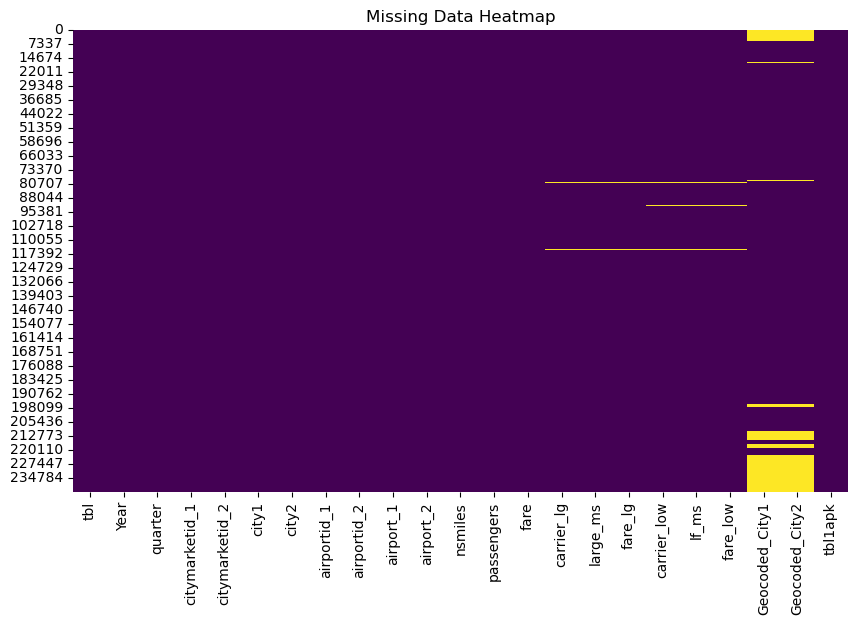

In [6]:
# Generate heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

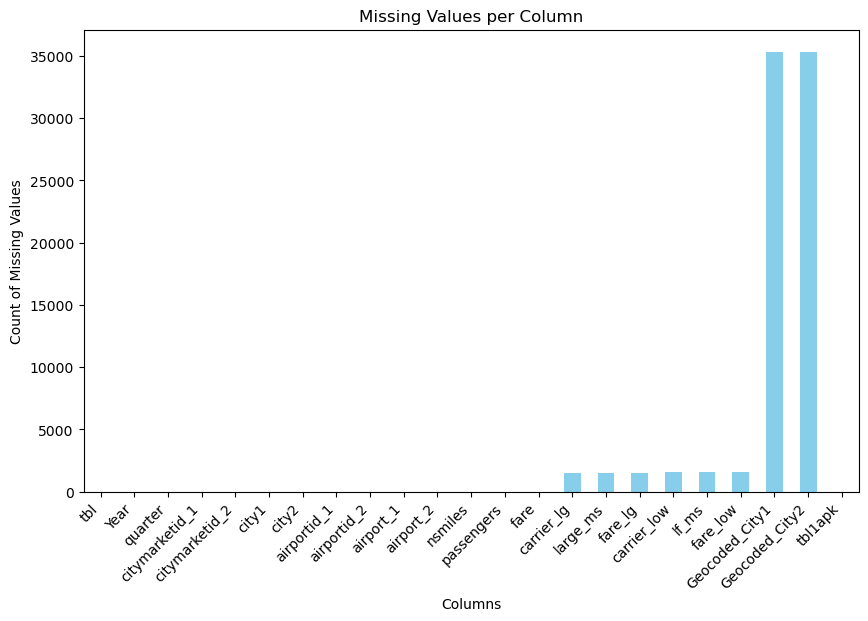

In [7]:
# Calculate the count of missing values for each column
missing_values_count = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
# Drop columns columns and rows 
df.drop(columns=['Geocoded_City1', 'Geocoded_City2'], inplace=True)
df.dropna(subset=['carrier_lg','carrier_low'], inplace=True)



In [9]:
#checking if the column geocodedcity 1 and 2 were droped. it was 23 columns, now it is 21
df.head()

tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airportid_2 airport_1  ... nsmiles  passengers    fare  carrier_lg  \
0        14112       ABE  ...     970         180   81.43          G4   
1        15304       ABE  ...     970          19  208.93          DL   
2        11259       ABQ  ...     580         204  184.56          WN   
3        11298       ABQ  ...     580         264  182.64          AA   
4        14107       ABQ  ...     328         398  177.11          WN   

  large_ms  fare_lg  carrier_low   lf_ms  fare_low                tbl1apk  
0   1.0000    81.43           G4  1.0000     81.43  202131013514112ABEPIE  
1   0.4659   219.98           UA  0.1193    154.11  202131013515304ABETPA  
2   0.9968   184.44           WN  0.9968    184.44  202131014011259ABQDAL  
3   0.9774   183.09           AA  0.9774    183.09  202131014011298ABQDFW  
4   0.6061   184.49           AA  0.3939    165.77  202131014014107ABQPHX  

[5 rows x 21 columns]

In [10]:
# Checking if there is any values that is missing: 
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)


Number of null values in each column:
tbl               0
Year              0
quarter           0
citymarketid_1    0
citymarketid_2    0
city1             0
city2             0
airportid_1       0
airportid_2       0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg        0
large_ms          0
fare_lg           0
carrier_low       0
lf_ms             0
fare_low          0
tbl1apk           0
dtype: int64


<AxesSubplot:xlabel='fare', ylabel='Count'>

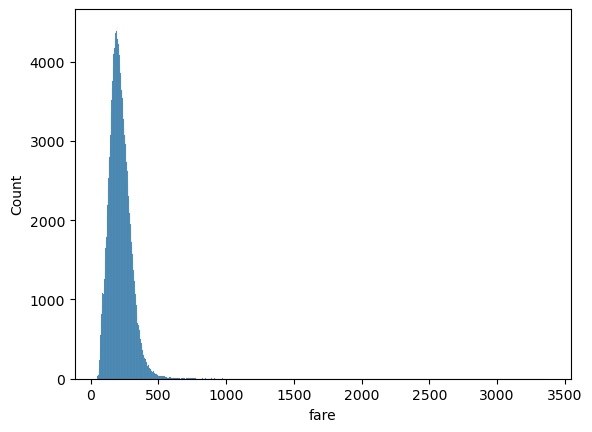

In [11]:
# Show historgram of 'age' variable after removing NA's
sns.histplot(df['fare'])

<AxesSubplot:xlabel='fare', ylabel='Density'>

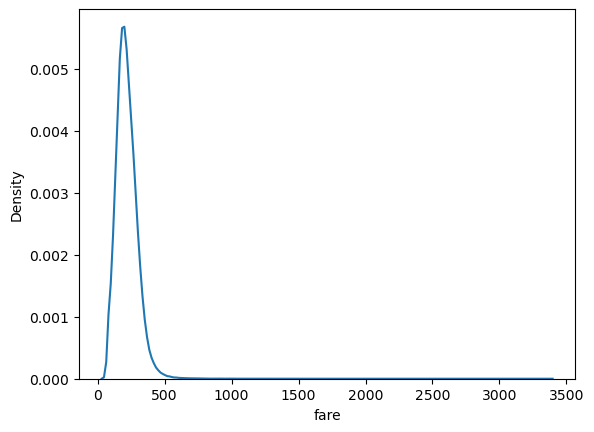

In [12]:
# Show density plot of 'age' variable.
# A density plot is like a histogram, but is used for continuous variables,
# so the y-axis does not measure count, but rather probability.
sns.kdeplot(df['fare'])

<AxesSubplot:ylabel='fare'>

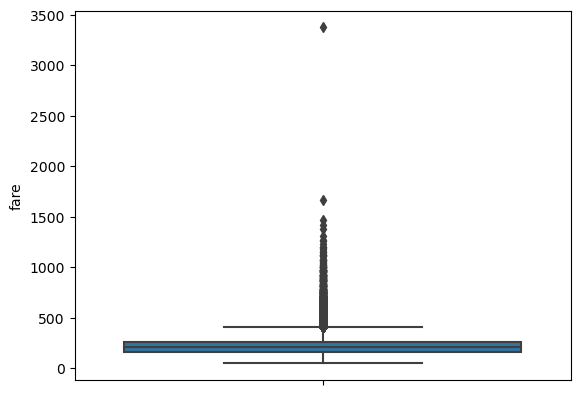

In [13]:
# Show boxplot for variable 'fare'
sns.boxplot(y = df['fare'])

In [14]:
# Calculate Z-scores for the 'fare' column
z_scores = np.abs(stats.zscore(df['fare']))

# Define a threshold for outlier detection
threshold = 3

# Find outlier indices
outlier_indices = np.where(z_scores > threshold)[0]

# Get the outlier values
outliers = df.iloc[outlier_indices]

print("Number of outliers detected:", len(outliers))
print(outliers)


Number of outliers detected: 2166
            tbl  Year  quarter  citymarketid_1  citymarketid_2  \
422     Table1a  2021        3           30647           31703   
578     Table1a  2021        3           30721           31703   
713     Table1a  2021        3           30849           31703   
1238    Table1a  2021        3           31703           32457   
1239    Table1a  2021        3           31703           32457   
...         ...   ...      ...             ...             ...   
241719  Table1a  2023        3           32575           31703   
241729  Table1a  2023        3           32575           31703   
241788  Table1a  2023        3           32575           33264   
242005  Table1a  2023        3           33667           30559   
242049  Table1a  2023        3           34489           32575   

                                        city1  \
422         Cleveland, OH (Metropolitan Area)   
578            Boston, MA (Metropolitan Area)   
713                       

In [15]:
# Summary statistics for the outliers
outliers_fare_stats = outliers['fare'].describe()
print(outliers_fare_stats)


count    2166.000000
mean      558.193283
std       143.264346
min       456.050000
25%       477.495000
50%       510.630000
75%       582.000000
max      3377.000000
Name: fare, dtype: float64


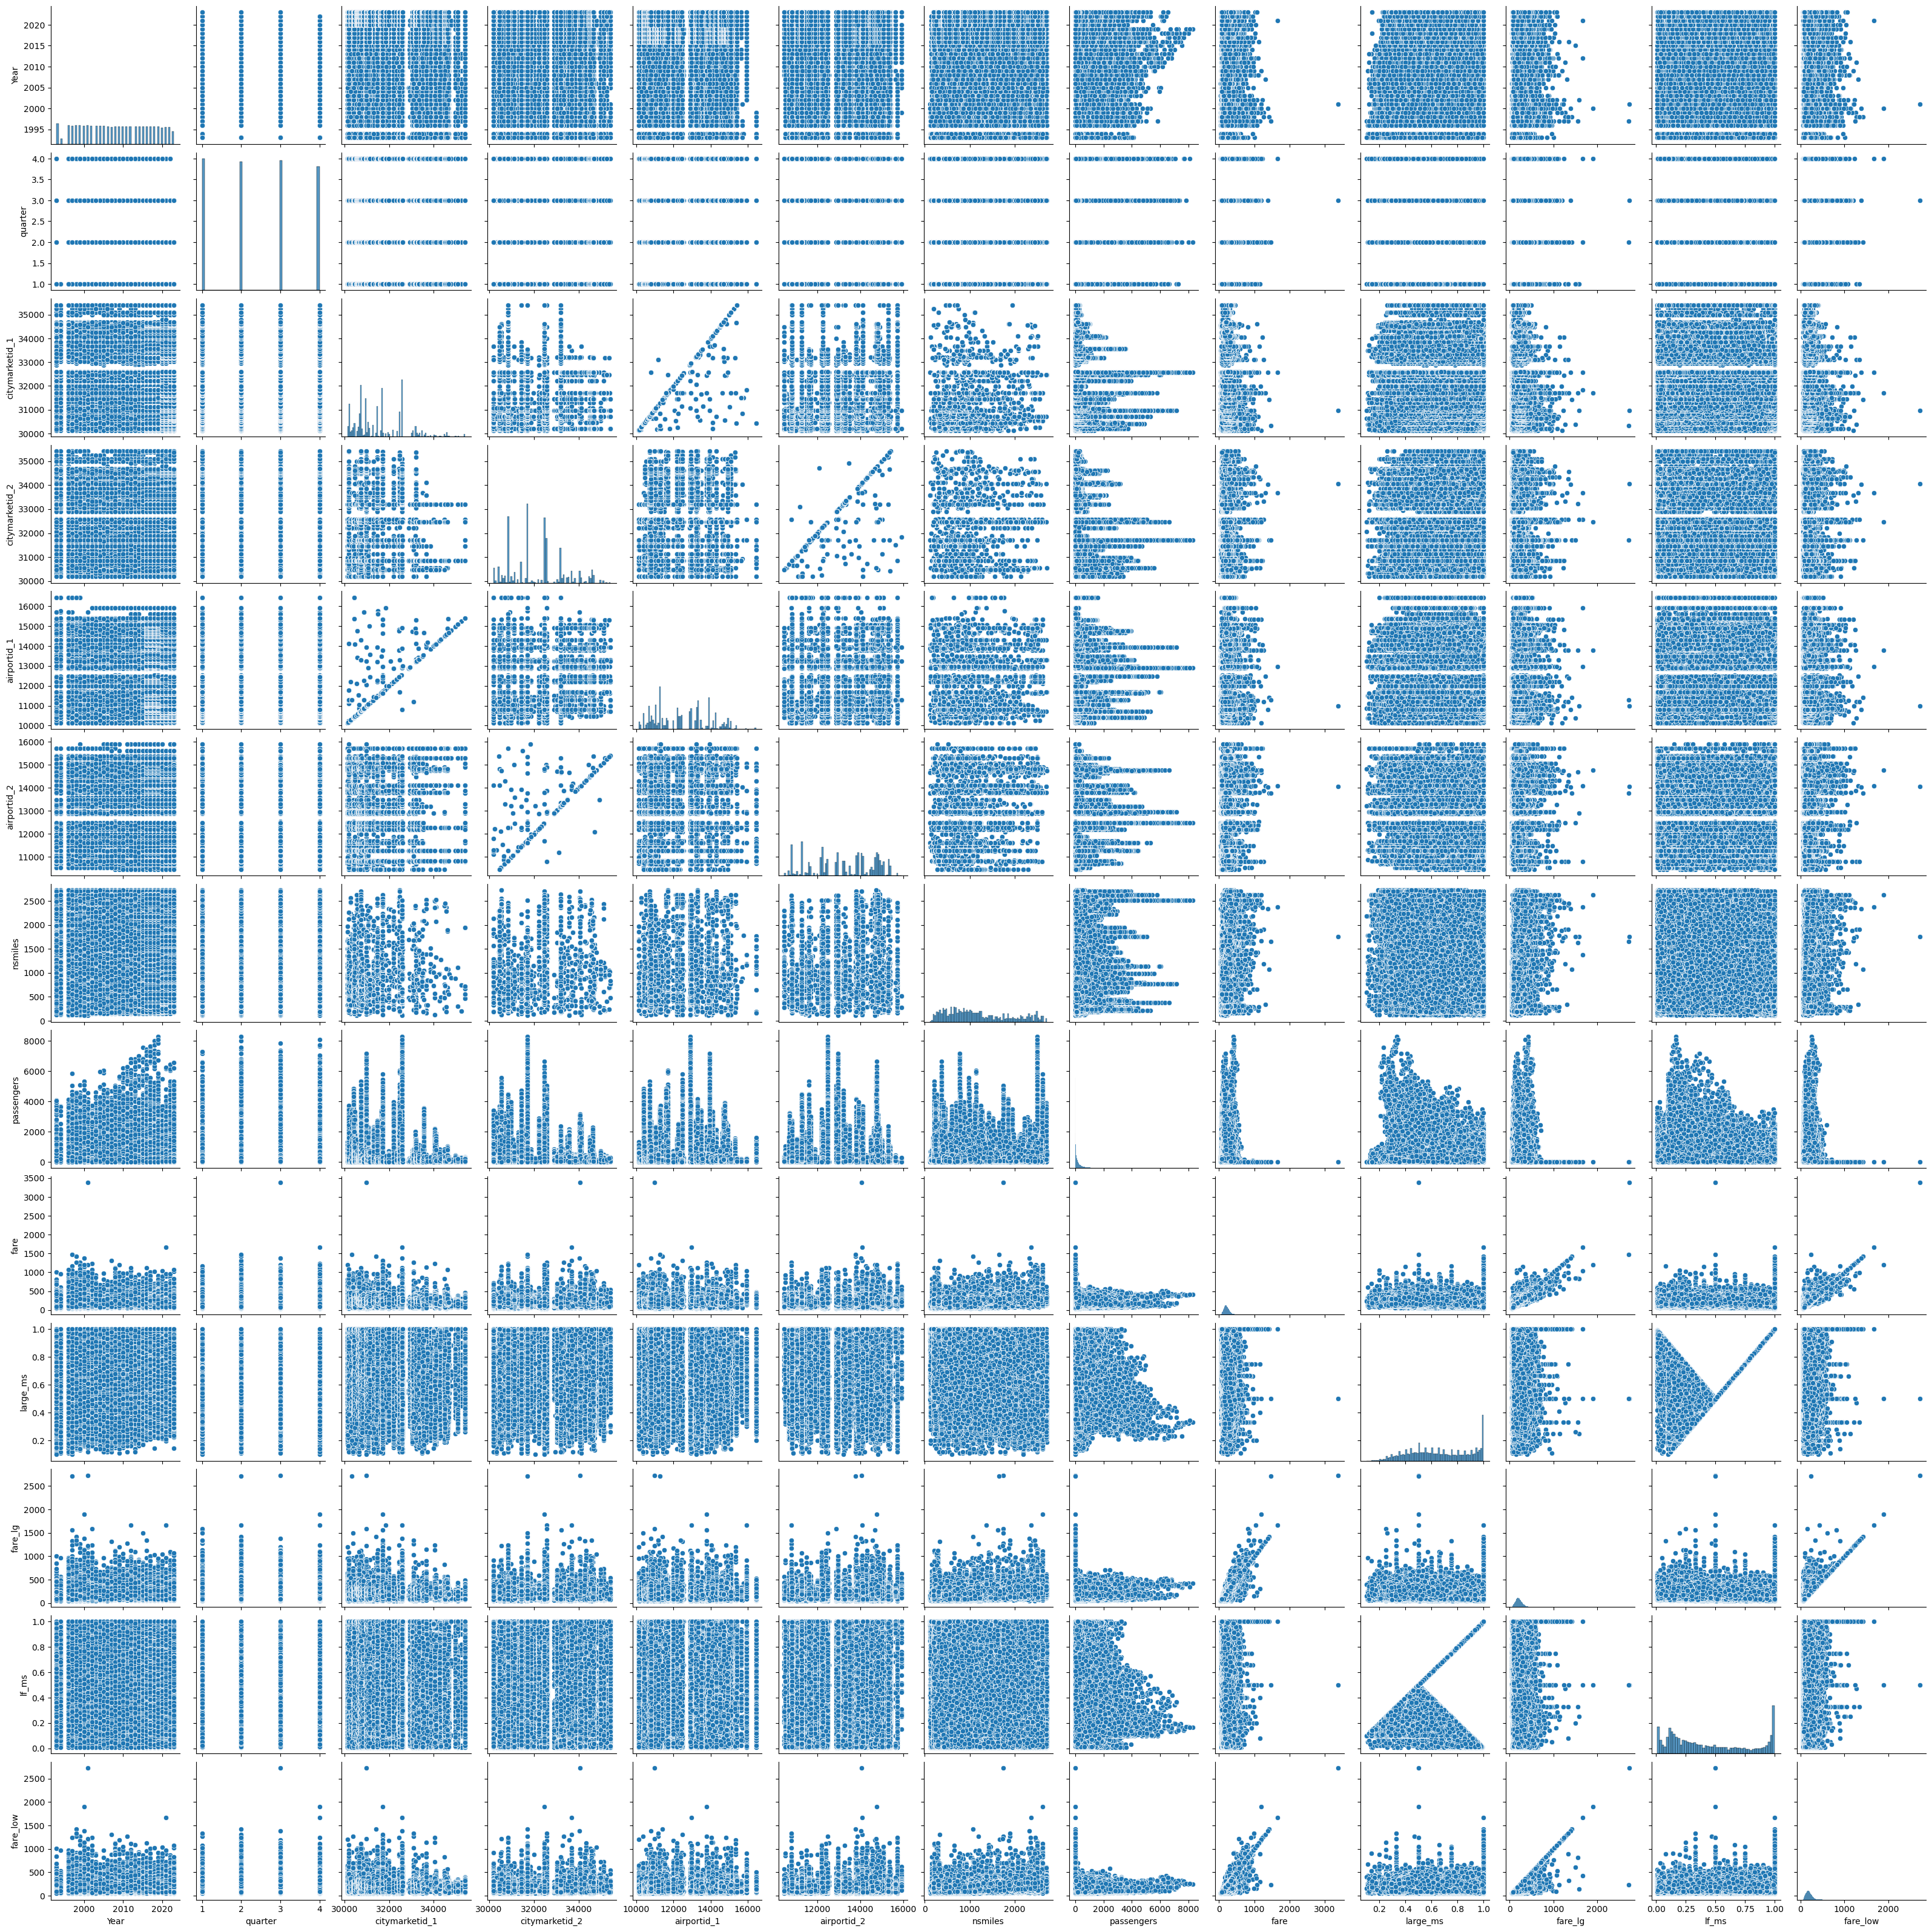

In [16]:
# Subset of columns to include in the pairplot
numeric_columns = df.select_dtypes(include='number').columns

# Create pairplot with a subset of numeric columns
sns.pairplot(df[numeric_columns])
plt.show()


In [17]:
# Show correlation between numeric variables
df.corr()

Year   quarter  citymarketid_1  citymarketid_2  \
Year            1.000000  0.006754       -0.000727       -0.007026   
quarter         0.006754  1.000000        0.000528        0.003444   
citymarketid_1 -0.000727  0.000528        1.000000        0.006703   
citymarketid_2 -0.007026  0.003444        0.006703        1.000000   
airportid_1    -0.010454  0.000570        0.526758        0.043543   
airportid_2    -0.015067  0.000755        0.060929        0.538039   
nsmiles         0.020722  0.000955        0.104475        0.091657   
passengers      0.080439  0.016344       -0.043634       -0.090691   
fare            0.156439 -0.027134        0.045535        0.014676   
large_ms        0.101542 -0.001279       -0.119594       -0.024394   
fare_lg         0.147576 -0.024593        0.037913        0.009373   
lf_ms           0.100882 -0.000994       -0.056349        0.022143   
fare_low        0.172071 -0.016004        0.034080        0.029587   

                airportid_1  airportid_2   nsmiles  passengers      fare  \
Year              -0.010454    -0.015067  0.020722    0.080439  0.156439   
quarter            0.000570     0.000755  0.000955    0.016344 -0.027134   
citymarketid_1     0.526758     0.060929  0.104475   -0.043634  0.045535   
citymarketid_2     0.043543     0.538039  0.091657   -0.090691  0.014676   
airportid_1        1.000000     0.066865  0.091126   -0.015441  0.035056   
airportid_2        0.066865     1.000000  0.182528   -0.017827  0.051562   
nsmiles            0.091126     0.182528  1.000000   -0.079680  0.511950   
passengers        -0.015441    -0.017827 -0.079680    1.000000 -0.176822   
fare               0.035056     0.051562  0.511950   -0.176822  1.000000   
large_ms          -0.105120    -0.084598 -0.402834   -0.076083 -0.183965   
fare_lg            0.027155     0.046277  0.483367   -0.130351  0.956339   
lf_ms             -0.035845    -0.020958 -0.253121   -0.120787 -0.189452   
fare_low           0.037925     0.056806  0.417748   -0.204958  0.876175   

                large_ms   fare_lg     lf_ms  fare_low  
Year            0.101542  0.147576  0.100882  0.172071  
quarter        -0.001279 -0.024593 -0.000994 -0.016004  
citymarketid_1 -0.119594  0.037913 -0.056349  0.034080  
citymarketid_2 -0.024394  0.009373  0.022143  0.029587  
airportid_1    -0.105120  0.027155 -0.035845  0.037925  
airportid_2    -0.084598  0.046277 -0.020958  0.056806  
nsmiles        -0.402834  0.483367 -0.253121  0.417748  
passengers     -0.076083 -0.130351 -0.120787 -0.204958  
fare           -0.183965  0.956339 -0.189452  0.876175  
large_ms        1.000000 -0.180143  0.532274 -0.084357  
fare_lg        -0.180143  1.000000 -0.235872  0.830450  
lf_ms           0.532274 -0.235872  1.000000  0.054363  
fare_low       -0.084357  0.830450  0.054363  1.000000

<AxesSubplot:>

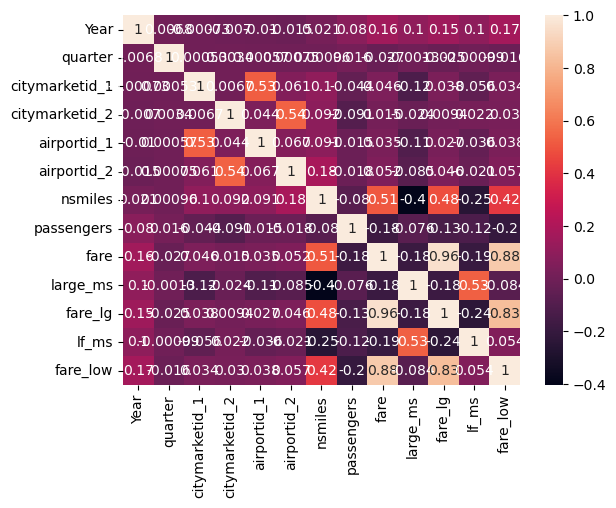

In [18]:
# Show correlation between variables as a heatmap instead
# (light colors means higher correlation,
# dark colors means lower correlation)
sns.heatmap(df.corr(), annot=True)

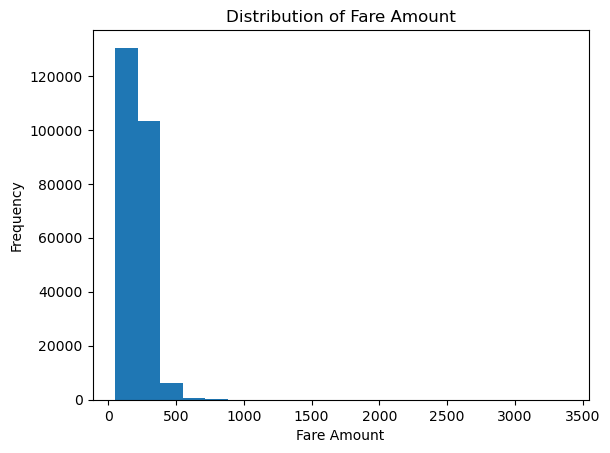

In [19]:
#Plot fare_amount distribution
plt.hist(df['fare'], bins=20)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()


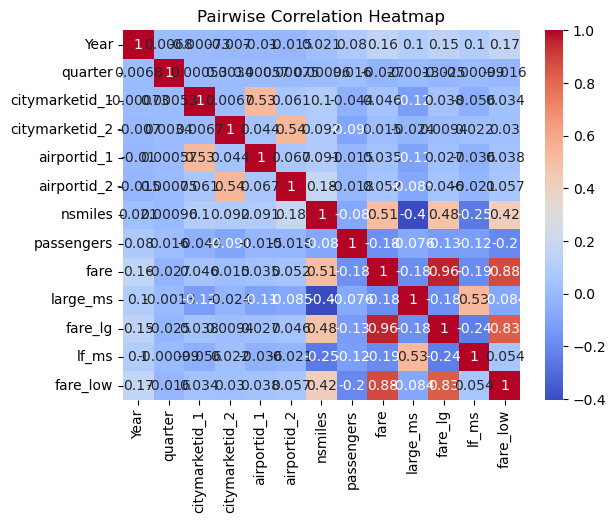

In [20]:
# Pairwise correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap')
plt.show()


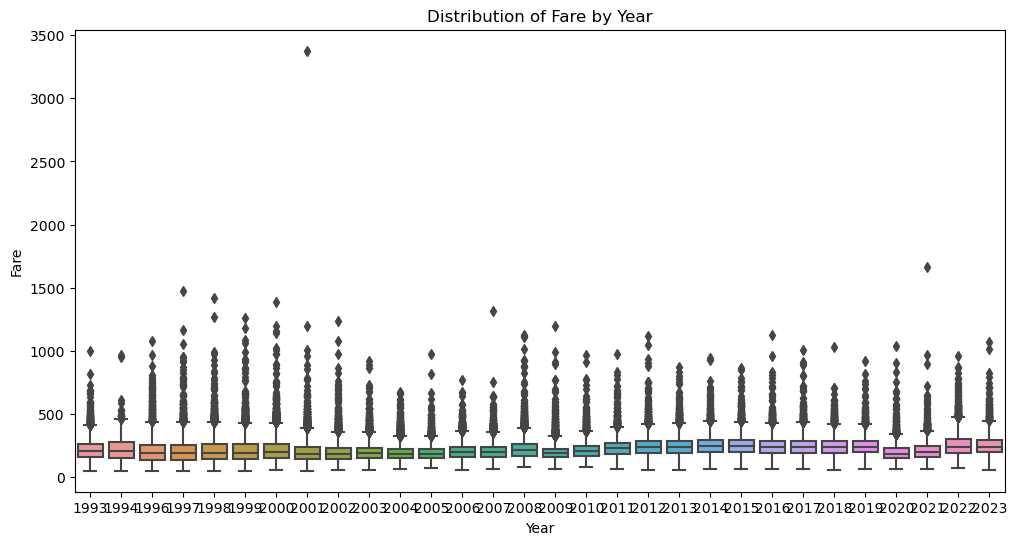

In [22]:
# Distribution of fare by year and quarter


plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='fare', data=df)
plt.title('Distribution of Fare by Year')
plt.xlabel('Year')
plt.ylabel('Fare')
plt.show()


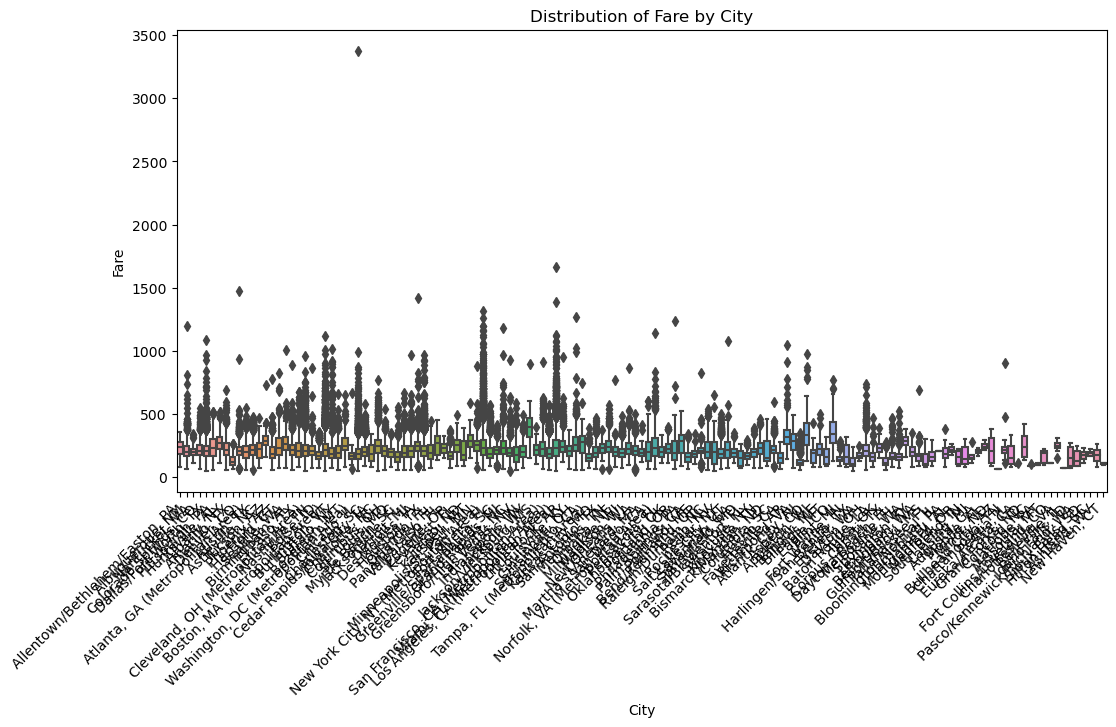

In [24]:

# Distribution of fare by city


plt.figure(figsize=(12, 6))
sns.boxplot(x='city1', y='fare', data=df)
plt.title('Distribution of Fare by City')
plt.xlabel('City')
plt.ylabel('Fare')
plt.xticks(rotation=45, ha='right')
plt.show()


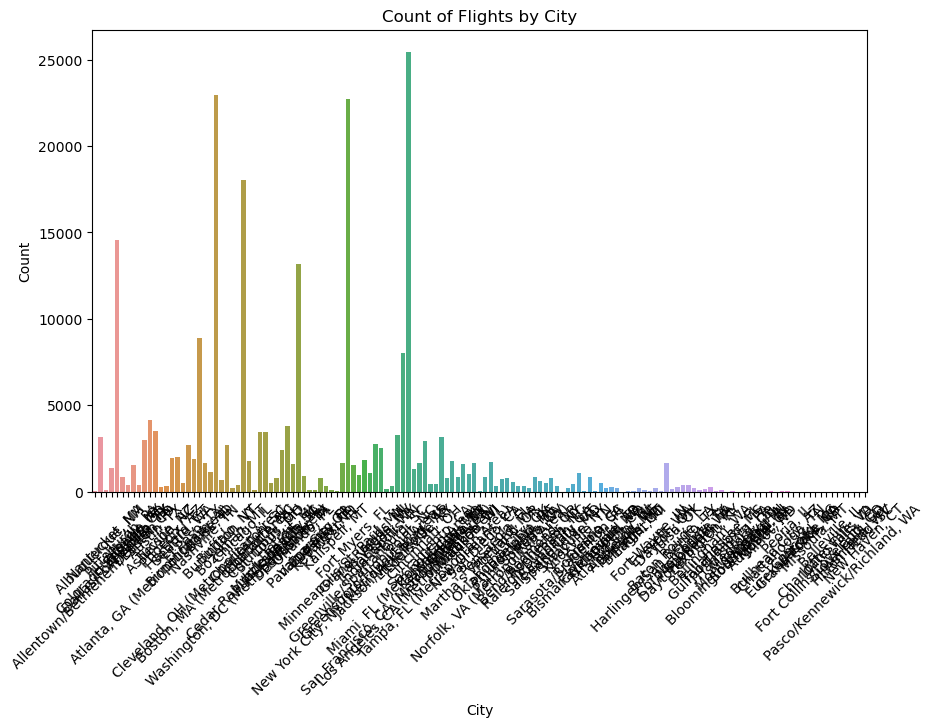

In [26]:
#bar plot showing the 
plt.figure(figsize=(10, 6))
sns.countplot(x='city1', data=df)
plt.title('Count of Flights by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


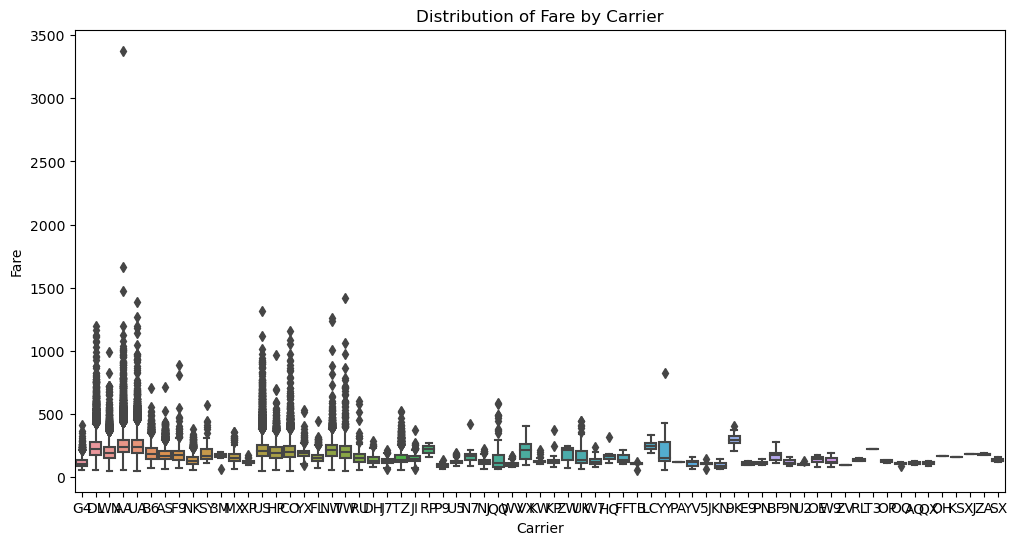

In [33]:
# Distribution of fare by carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier_lg', y='fare', data=df)
plt.title('Distribution of Fare by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Fare')
plt.show()

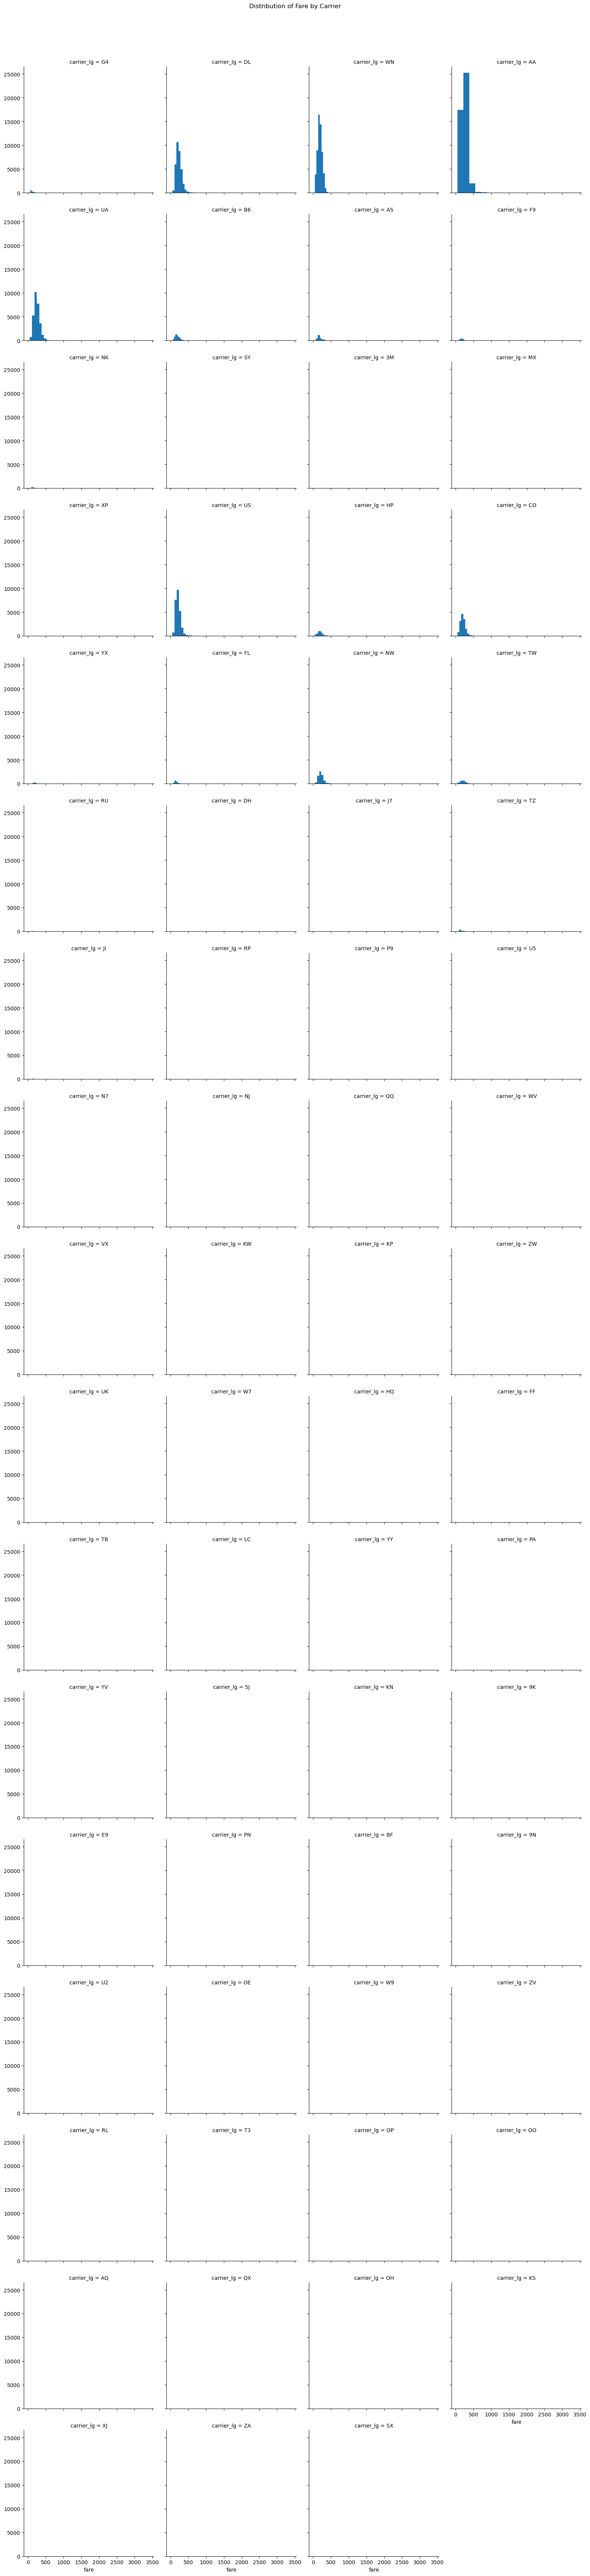

In [36]:
g = sns.FacetGrid(df, col='carrier_lg', col_wrap=4, height=4)
g.map(plt.hist, 'fare', bins=20)
plt.suptitle('Distribution of Fare by Carrier', y=1.02)
plt.show()


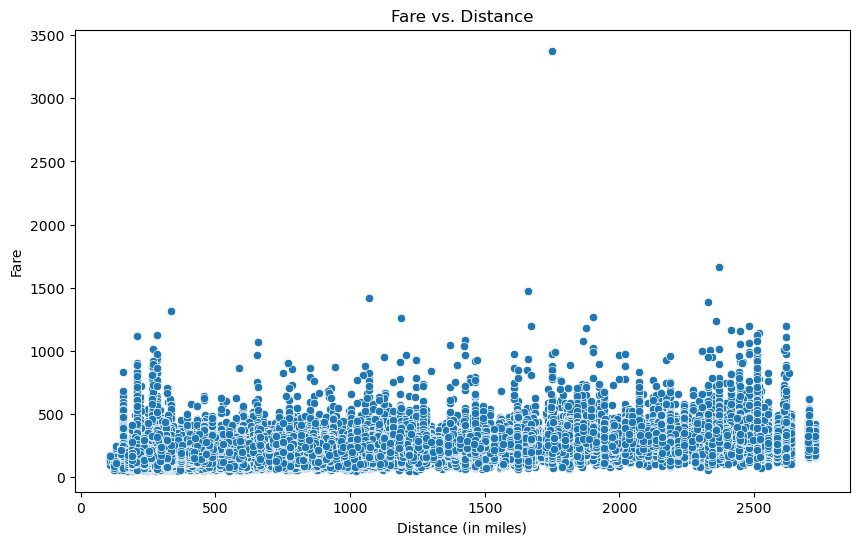

In [35]:

# Scatter plot of fare against Non-Stop market miles (nsmiles)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nsmiles', y='fare', data=df)
plt.title('Fare vs. Distance')
plt.xlabel('Distance (in miles)')
plt.ylabel('Fare')
plt.show()


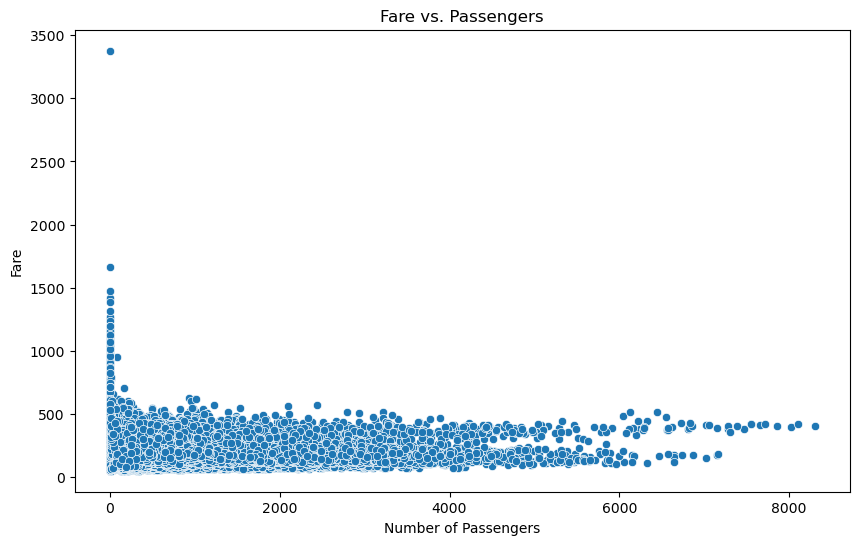

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passengers', y='fare', data=df)
plt.title('Fare vs. Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.show()


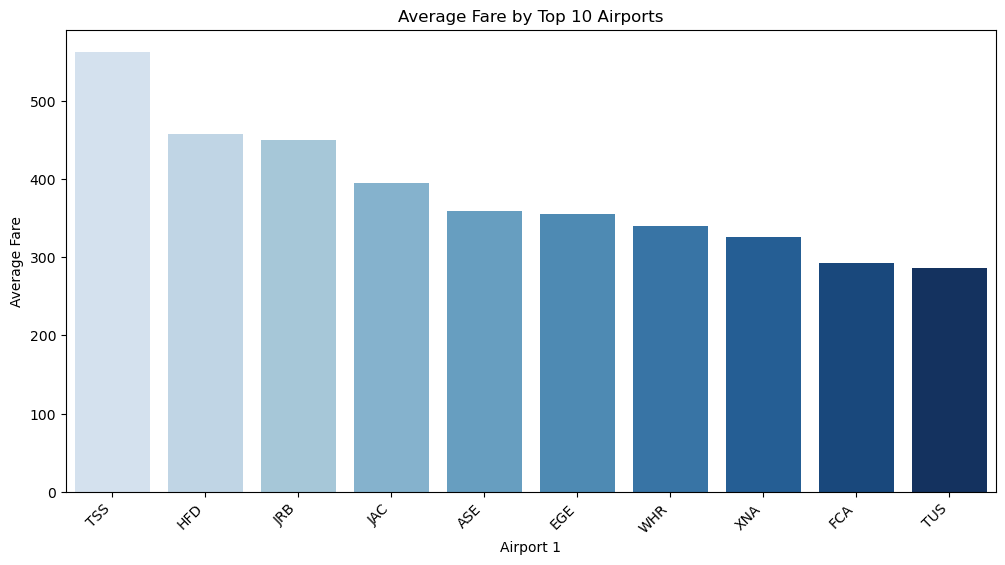

In [51]:


# Calculate average fare for each airport
airport_avg_fare = df.groupby('airport_1')['fare'].mean().sort_values(ascending=False).head(10)
# Define a colormap
cmap = plt.cm.get_cmap('Blues')
# Create a list of colors from the colormap
colors = [cmap(i) for i in np.linspace(0.2, 1, len(airport_avg_fare))]  

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=airport_avg_fare.index, y=airport_avg_fare.values, palette=colors)
plt.title('Average Fare by Top 10 Airports')
plt.xlabel('Airport 1')
plt.ylabel('Average Fare')
plt.xticks(rotation=45, ha='right')
plt.show()


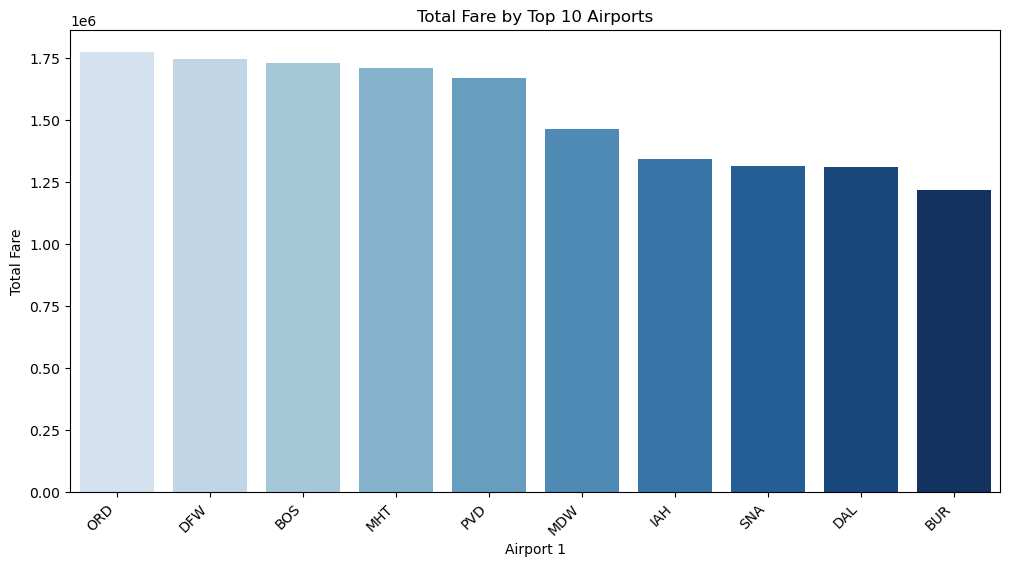

In [47]:

# Calculate total fare for each airport
airport_fare_totals = df.groupby('airport_1')['fare'].sum().sort_values(ascending=False)

# Select top N airports
top_airports = airport_fare_totals.head(10)

# Define a colormap
cmap = plt.cm.get_cmap('Blues')

# Create a list of colors from the colormap
colors = [cmap(i) for i in np.linspace(0.2, 1, len(top_airports))]  

# Plotting
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_airports.index, y=top_airports.values, palette=colors)
bars.set_title('Total Fare by Top 10 Airports')
bars.set_xlabel('Airport 1')
bars.set_ylabel('Total Fare')
plt.xticks(rotation=45, ha='right')
plt.show()


In [48]:
#plt.figure(figsize=(10, 6))
#sns.barplot(x='passengers', y='fare', data=df, estimator=np.mean)
#plt.title('Average Fare by Number of Passengers')
#plt.xlabel('Number of Passengers')
#plt.ylabel('Average Fare')
#plt.show()


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>